Exercise 15.16

0.013248282588684934
0.20198479029246175
0.005354340896011167
-0.00014482879514843283
-0.005243012684986947
0.0072625958422786185
-0.0004587579377355322
0.4681147468637117


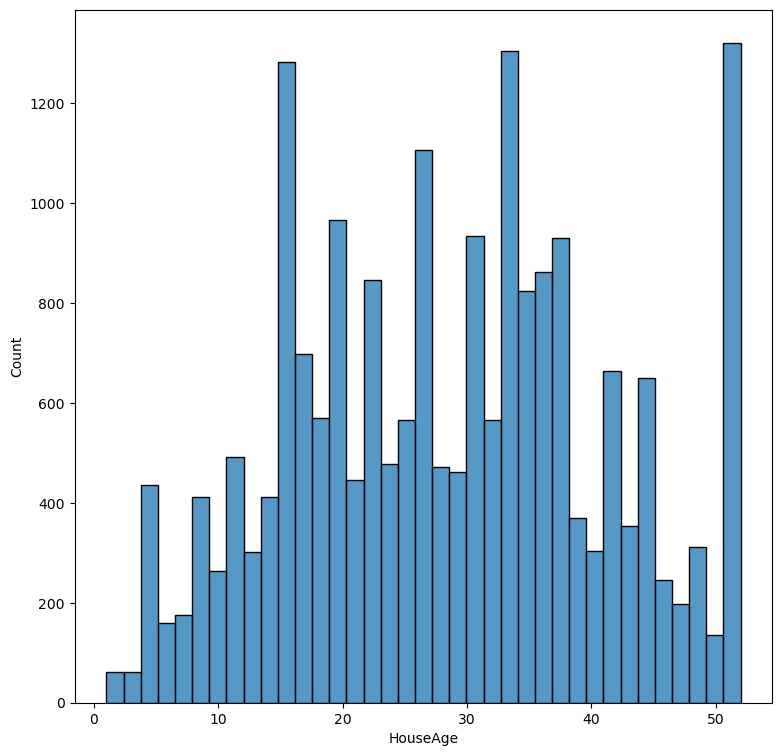

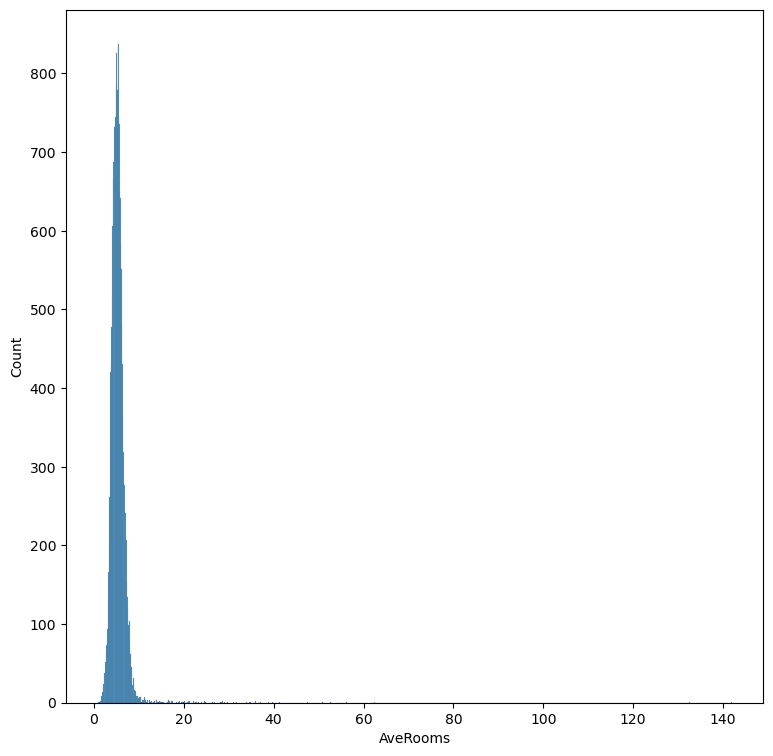

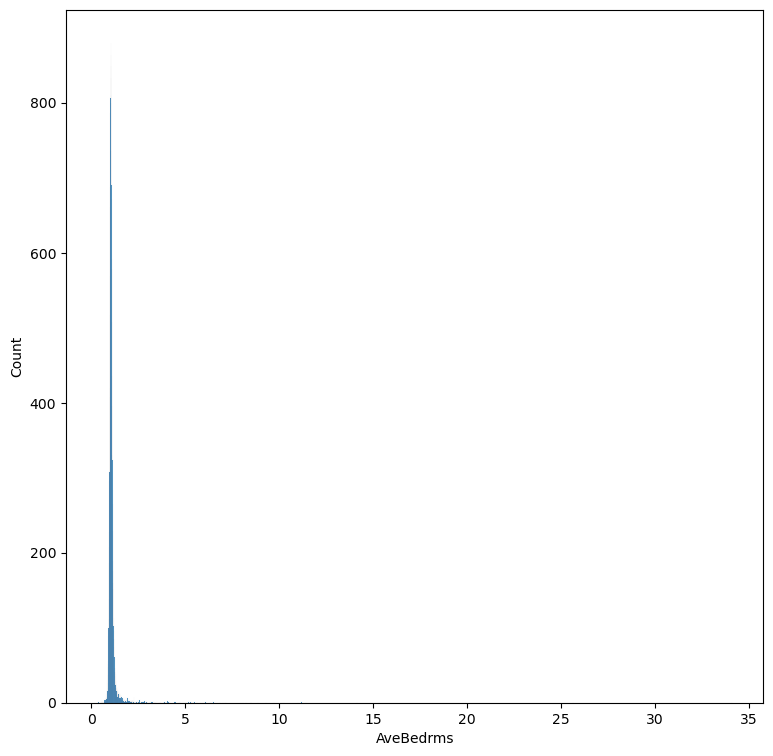

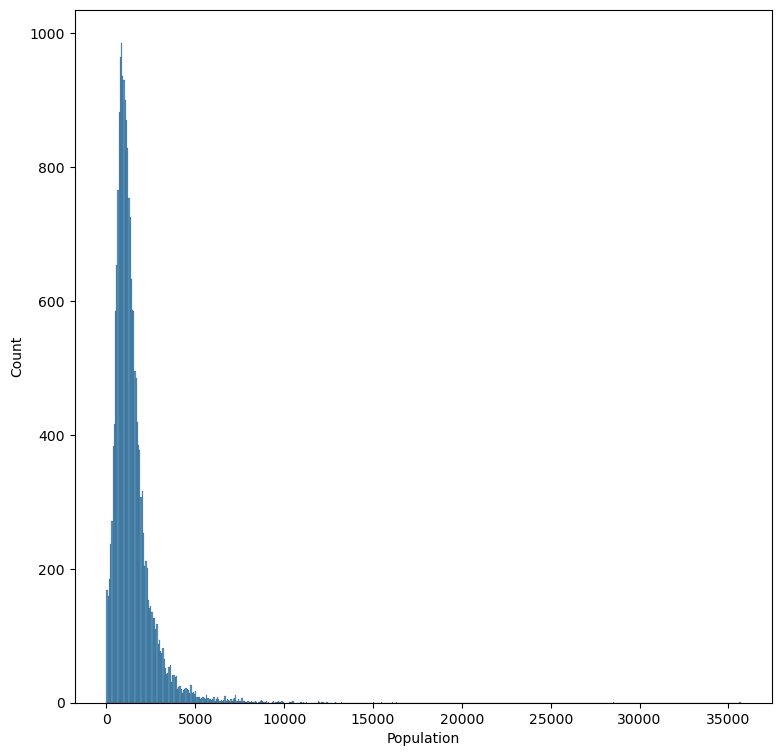

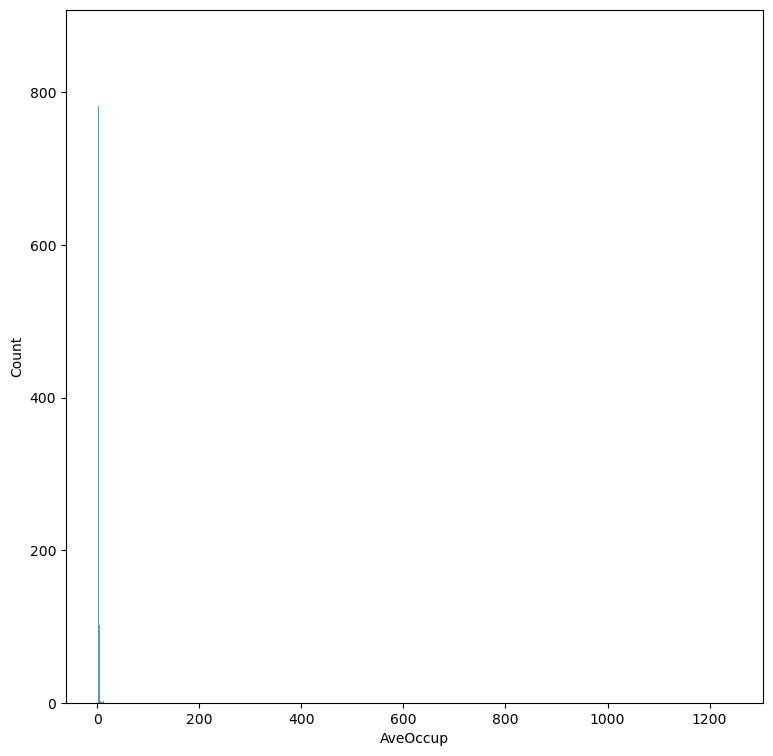

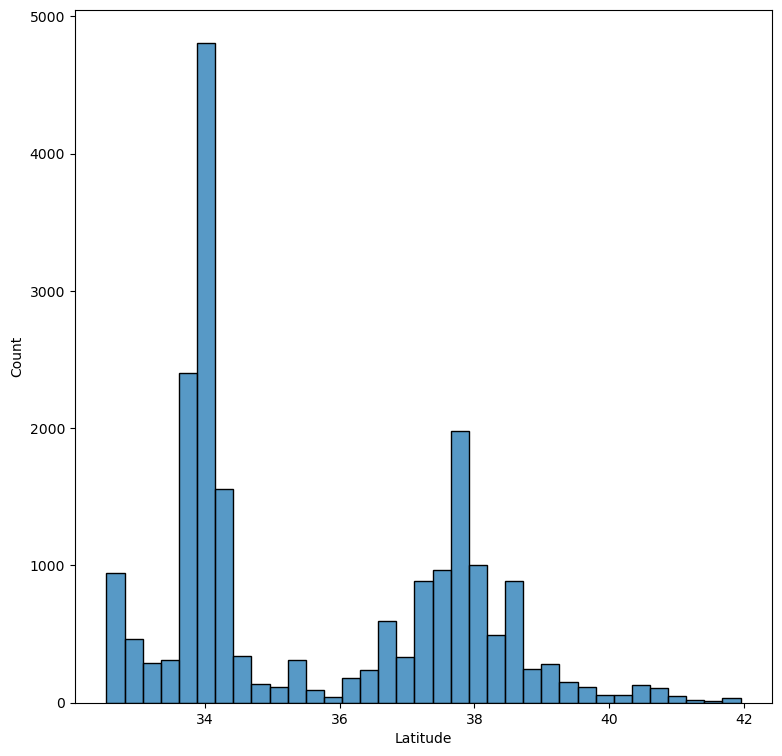

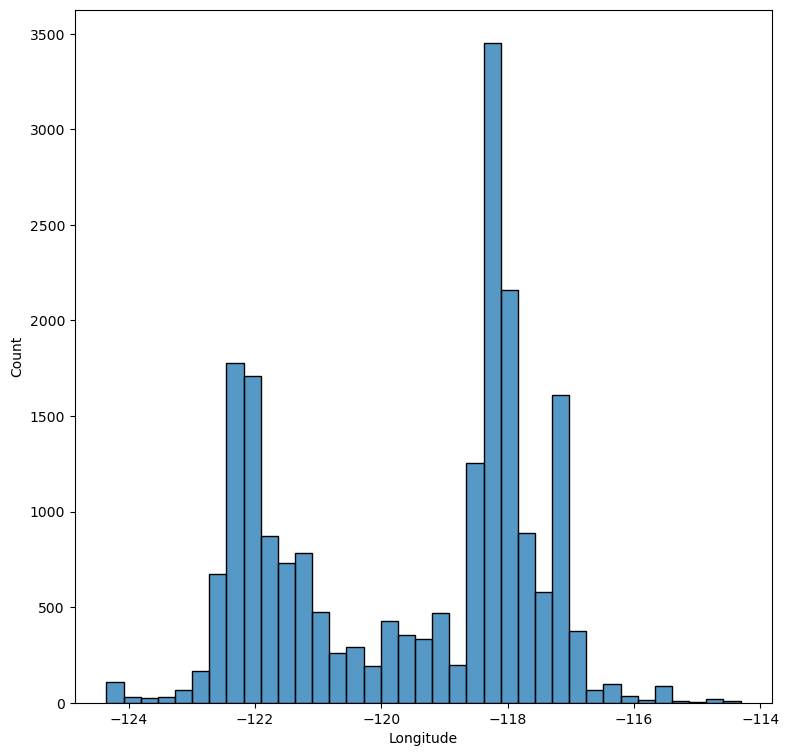

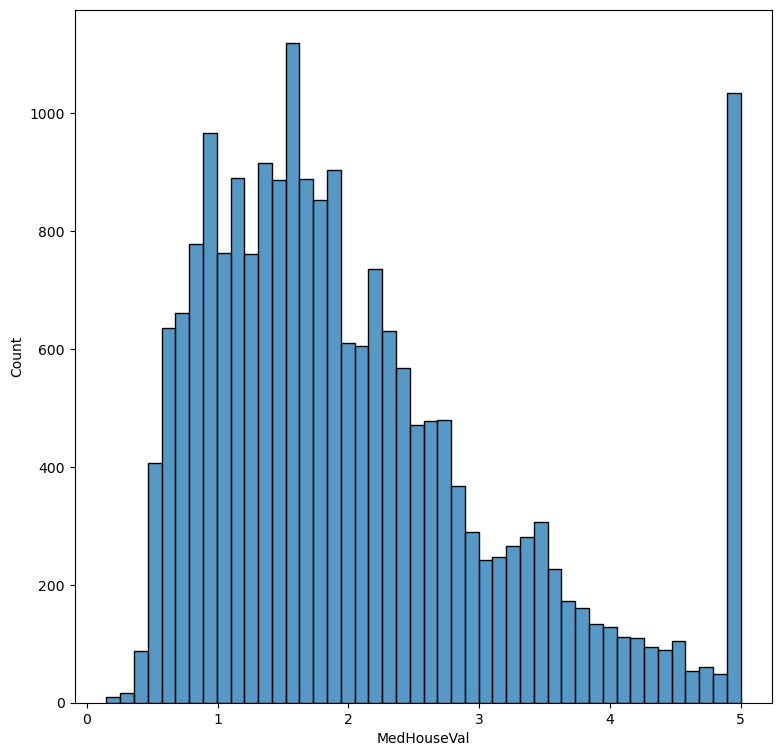

In [75]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import pandas as pd
import numpy as np

california = fetch_california_housing(as_frame=True).frame
features = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
pdf = matplotlib.backends.backend_pdf.PdfPages("Grothaus_Christian_FinalProject_Visualization.pdf")

# Create graphs for each feature and save to visualization file
def createCountHistPlot(feature):
  figure = plt.figure(figsize=(9, 9))
  axes = sns.histplot(data=california, x=feature, legend=False)
  pdf.savefig(figure)

def getR2Score(featureName):
  linearRegression = LinearRegression()
  # Reshape series to make it compatible with the function
  xTrain, xTest, yTrain, yTest = train_test_split(california.MedInc.values.reshape(-1, 1), california[featureName], random_state=56)
  linearRegression.fit(X=xTrain, y=yTrain)

  predicted = linearRegression.predict(xTest)
  expected = yTest

  # Get R2 score
  return metrics.r2_score(expected, predicted)

# Run on all 8 features
for feature in features:
  createCountHistPlot(feature)
  print(getR2Score(feature))

pdf.close()

15.16: The multiple linear regression produced the best results having an R2 score of ~0.6009.  Comparatively, the best score out of the linear regressions was ~0.4681.

In [76]:
X = california.MedInc.values.reshape(-1, 1) # Reshape the series to make it compatible with the classifier
y = california.MedHouseVal.round() # Round this to allow it to be used in kNN and have classifications

for k in range(1, 20, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn, X=X, y=y)
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; standard deviation={scores.std():.2%}')

xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=21, shuffle=False)
# Set to 9 to achieve a higher accuracy without increasing the standard deviation too much
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X=xTrain, y=yTrain)
predicted = knn.predict(xTrain)
expected = yTrain
metrics.r2_score(expected, predicted)

k=1 ; mean accuracy=41.31%; standard deviation=1.39%
k=3 ; mean accuracy=45.70%; standard deviation=1.91%
k=5 ; mean accuracy=48.24%; standard deviation=2.08%
k=7 ; mean accuracy=49.31%; standard deviation=2.08%
k=9 ; mean accuracy=50.45%; standard deviation=1.88%
k=11; mean accuracy=50.81%; standard deviation=2.10%
k=13; mean accuracy=51.11%; standard deviation=2.34%
k=15; mean accuracy=51.63%; standard deviation=2.22%
k=17; mean accuracy=52.25%; standard deviation=2.21%
k=19; mean accuracy=52.45%; standard deviation=2.37%


0.3420914132899566